In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
df = pd.read_csv("/content/ai4i2020.csv")

print("Dataset loaded successfully")
print("Dataset shape:", df.shape)
df.head()


Dataset loaded successfully
Dataset shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float

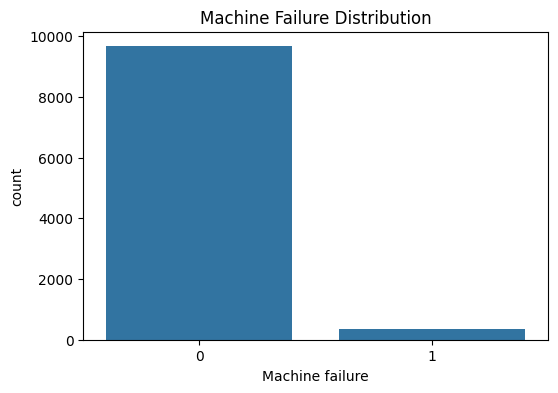

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Machine failure', data=df)
plt.title("Machine Failure Distribution")
plt.show()


In [ ]:
df.drop(['UDI', 'Product ID', 'Type'], axis=1, inplace=True)

print("\nColumns after preprocessing:")
print(df.columns)



Columns after preprocessing:
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


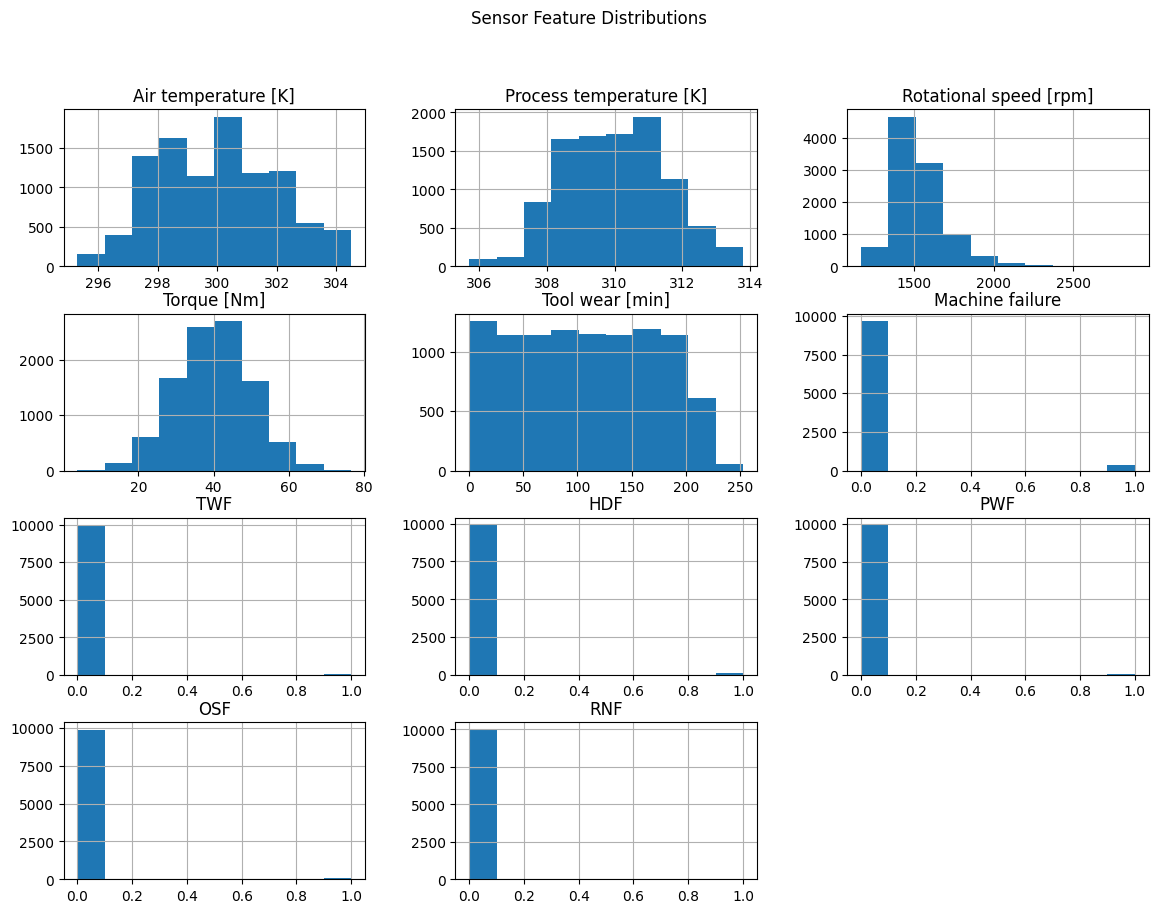

In [ ]:
df.hist(figsize=(14,10))
plt.suptitle("Sensor Feature Distributions")
plt.show()


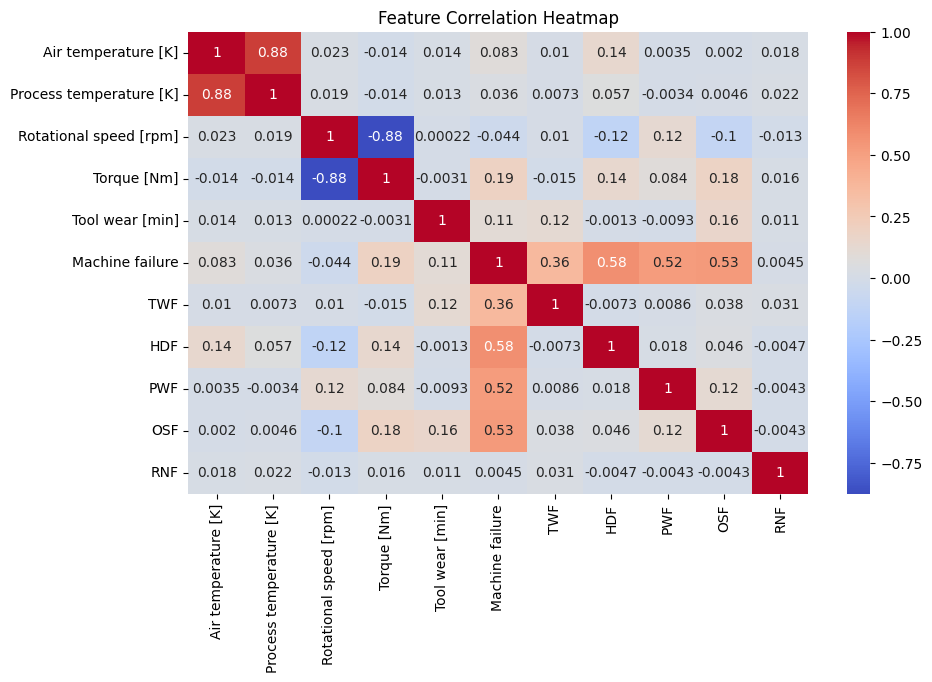

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

print("\nFeature shape:", X.shape)
print("Target distribution:")
print(y.value_counts())



Feature shape: (10000, 10)
Target distribution:
Machine failure
0    9661
1     339
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (8000, 10)
Test shape: (2000, 10)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nScaling completed")
print("Sample scaled values:\n", X_train[:3])



Scaling completed
Sample scaled values:
 [[ 0.99891359  0.60428162 -0.46060741  0.71830476 -0.84399726 -0.06723349
  -0.10424403 -0.10176517 -0.10176517 -0.04334192]
 [-1.50519408 -1.15325984 -0.77557391  0.63845583  0.38226308 -0.06723349
  -0.10424403 -0.10176517 -0.10176517 23.07234997]
 [ 0.49809206  1.07746586 -1.00765448  0.5586069   0.46086951 -0.06723349
  -0.10424403 -0.10176517 -0.10176517 -0.04334192]]


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



--- Random Forest Results ---
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("\n--- XGBoost Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:30:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Results ---
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



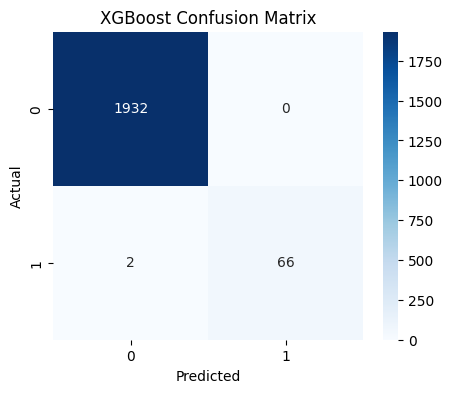

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

model.fit(
    X_train_lstm,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9079 - loss: 0.5123 - val_accuracy: 1.0000 - val_loss: 0.0664
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0478 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9990 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9988 - loss: 0.0088 - val_accuracy: 1.

In [ ]:
loss, lstm_accuracy = model.evaluate(X_test_lstm, y_test)

print("\n--- LSTM Results ---")
print("Accuracy:", lstm_accuracy)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0038

--- LSTM Results ---
Accuracy: 0.9990000128746033


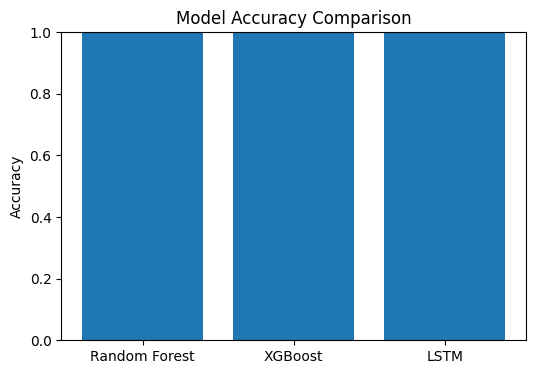

In [ ]:
models = ['Random Forest', 'XGBoost', 'LSTM']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    lstm_accuracy
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [ ]:
print("\nConclusion:")
print("XGBoost performed best for predictive maintenance in manufacturing.")



Conclusion:
XGBoost performed best for predictive maintenance in manufacturing.
